# DSAI GROUP 8 : HAPPINESS INDEX

# General info

Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Import main data and check contents

In [2]:
data = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name="Table2.1")
data.tail(20)

country  year  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect  Confidence in national government  Democratic Quality  Delivery Quality  Standard deviation of ladder by country-year  Standard deviation/Mean of ladder by country-year  GINI index (World Bank estimate)  GINI index (World Bank estimate), average 2000-15  gini of household income reported in Gallup, by wp5-year
1542    Zambia  2009     5.260361            8.026193        0.781926                         47.393818                      0.696183   -0.104799                   0.916553         0.727505         0.122659                           0.413418            0.133997         -0.567933                                      1.889908                                           0.359273                               NaN                                             0.5274                                           0.581005       
1543    Zambia  2011     4.999114            8.120028        0.864023                         49.695122                      0.662850   -0.006662                   0.882150         0.833214         0.204070                           0.397613            0.169676         -0.487765                                      1.729702                                           0.346002                               NaN                                             0.5274                                           0.521399       
1544    Zambia  2012     5.013375            8.163204        0.780023                         50.674156                      0.787760   -0.002135                   0.806394         0.725965         0.250368                           0.594114            0.264068         -0.388092                                      2.200456                                           0.438917                               NaN                                             0.5274                                           0.610944       
1545    Zambia  2013     5.243996            8.182191        0.761312                         51.510342                      0.769912   -0.114406                   0.732268         0.734979         0.307960                           0.552761            0.164946         -0.385220                                      2.562254                                           0.488607                               NaN                                             0.5274                                           0.514960       
1546    Zambia  2014     4.345837            8.197678        0.706223                         52.193890                      0.811825   -0.020871                   0.808841         0.692035         0.327384                           0.606339            0.023306         -0.395449                                      2.521534                                           0.580218                               NaN                                             0.5274                                           0.621956       
1547    Zambia  2015     4.843164            8.196217        0.691483                         52.730522                      0.758654   -0.048977                   0.871020         0.690034         0.381731                           0.631103            0.040718         -0.391482                                      3.080448                                           0.636040                             0.571                                             0.5274                                           0.671201       
1548    Zambia  2016     4.347544            8.201650        0.767047                         53.267151                      0.811575    0.112273                   0.770644         0.730680         0.372241                           0.696892           -0.058471         -0.460033                                      3.197226                                          

In [3]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1562, 19)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
country                                                     1562 non-null object
year                                                        1562 non-null int64
Life Ladder                                                 1562 non-null float64
Log GDP per capita                                          1535 non-null float64
Social support                                              1549 non-null float64
Healthy life expectancy at birth                            1553 non-null float64
Freedom to make life choices                                1533 non-null float64
Generosity                                                  1482 non-null float64
Perceptions of corruption                                   1472 non-null float64
Positive affect                                             1544 non-null float64
Negative affect                                             1550 non-null fl

# Clean

#### Start cleaning process.

Remove unneccessary data columns. Store into dataframe dataV1.
Using for loop to get all the required titles for the the Dataframe in an array.

In [5]:
dataCol = []
for i in data:
    dataCol.append(i)
    if(i == 'Delivery Quality'):
        break
dataCol.append('GINI index (World Bank estimate), average 2000-15')
print(dataCol)

['country', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Confidence in national government', 'Democratic Quality', 'Delivery Quality', 'GINI index (World Bank estimate), average 2000-15']


In [6]:
dataV1 = pd.DataFrame(data[dataCol])
dataV1.describe()

year  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices   Generosity  Perceptions of corruption  Positive affect  Negative affect  Confidence in national government  Democratic Quality  Delivery Quality  GINI index (World Bank estimate), average 2000-15
count  1562.000000  1562.000000         1535.000000     1549.000000                       1553.000000                   1533.000000  1482.000000                1472.000000      1544.000000      1550.000000                        1401.000000         1391.000000       1391.000000                                        1386.000000
mean   2011.820743     5.433676            9.220822        0.810669                         62.249887                      0.728975     0.000079                   0.753622         0.708969         0.263171                           0.480207           -0.126617          0.004947                                           0.386948
std       3.419787     1.121017            1.184035        0.119370                          7.960671                      0.145408     0.164202                   0.185538         0.107644         0.084006                           0.190724            0.873259          0.981052                                           0.083694
min    2005.000000     2.661718            6.377396        0.290184                         37.766476                      0.257534    -0.322952                   0.035198         0.362498         0.083426                           0.068769           -2.448228         -2.144974                                           0.228833
25%    2009.000000     4.606351            8.310665        0.748304                         57.299580                      0.633754    -0.114313                   0.697359         0.621471         0.204116                           0.334732           -0.772010         -0.717463                                           0.321583
50%    2012.000000     5.332600            9.398610        0.833047                         63.803192                      0.748014    -0.022638                   0.808115         0.717398         0.251798                           0.463137           -0.225939         -0.210142                                           0.371000
75%    2015.000000     6.271025           10.190634        0.904329                         68.098228                      0.843628     0.094649                   0.880089         0.800858         0.311515                           0.610723            0.665944          0.717996                                           0.433104
max    2017.000000     8.018934           11.770276        0.987343                         76.536362                      0.985178     0.677773                   0.983276         0.943621         0.704590                           0.993604            1.540097          2.184725                                           0.626000

Number of Years: 13
2011    146
2014    145
2015    143
2016    142
2012    142
2017    141
2013    137
2010    124
2009    114
2008    110
2007    102
2006     89
2005     27
Name: year, dtype: int64


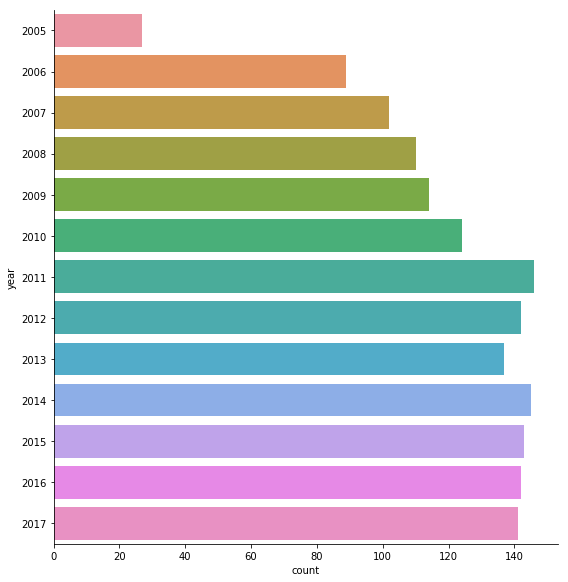

In [7]:
yearList = dataV1["year"].dropna().unique()
print("Number of Years:", len(yearList))

print(dataV1["year"].dropna().value_counts())
sb.catplot(y = "year", data = dataV1, kind = "count", height = 8)

Remove unnecessary data rows. Since 2005 data is so little, we remove 2005 data.

In [8]:
dataV2 = dataV1[dataV1.year != 2005]

dataV2.tail(20)

country  year  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect  Confidence in national government  Democratic Quality  Delivery Quality  GINI index (World Bank estimate), average 2000-15
1542    Zambia  2009     5.260361            8.026193        0.781926                         47.393818                      0.696183   -0.104799                   0.916553         0.727505         0.122659                           0.413418            0.133997         -0.567933                                             0.5274
1543    Zambia  2011     4.999114            8.120028        0.864023                         49.695122                      0.662850   -0.006662                   0.882150         0.833214         0.204070                           0.397613            0.169676         -0.487765                                             0.5274
1544    Zambia  2012     5.013375            8.163204        0.780023                         50.674156                      0.787760   -0.002135                   0.806394         0.725965         0.250368                           0.594114            0.264068         -0.388092                                             0.5274
1545    Zambia  2013     5.243996            8.182191        0.761312                         51.510342                      0.769912   -0.114406                   0.732268         0.734979         0.307960                           0.552761            0.164946         -0.385220                                             0.5274
1546    Zambia  2014     4.345837            8.197678        0.706223                         52.193890                      0.811825   -0.020871                   0.808841         0.692035         0.327384                           0.606339            0.023306         -0.395449                                             0.5274
1547    Zambia  2015     4.843164            8.196217        0.691483                         52.730522                      0.758654   -0.048977                   0.871020         0.690034         0.381731                           0.631103            0.040718         -0.391482                                             0.5274
1548    Zambia  2016     4.347544            8.201650        0.767047                         53.267151                      0.811575    0.112273                   0.770644         0.730680         0.372241                           0.696892           -0.058471         -0.460033                                             0.5274
1549    Zambia  2017     3.932777            8.211670        0.743754                         53.803783                      0.823169    0.129822                   0.739541         0.684623         0.387189                           0.717004                 NaN               NaN                                             0.5274
1550  Zimbabwe  2006     3.826268            7.366704        0.821656                         39.087681                      0.431110   -0.053216                   0.904757         0.715229         0.297147                           0.317073           -1.236102         -1.570760                                             0.4320
1551  Zimbabwe  2007     3.280247            7.313939        0.828113                         40.244083                      0.455957   -0.058068                   0.946287         0.660861         0.264989                           0.225752           -1.340245         -1.653740                                             0.4320
1552  Zimbabwe  2008     3.174264            7.102516        0.843475                         41.607285                      0.343556   -0.063873                   0.963846         0.630983         0.250060                           0.181594           -1.381488         -1.701545                                             0.4320
1553  Zimbabwe  2009     4.055914  

Taking the mean of every country to fill in the NaN values. Creating a new dataframe with Mean values for every country.

In [9]:
dataMean = dataV2.groupby('country').mean().reset_index()
dataMean.head()

country         year  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect  Confidence in national government  Democratic Quality  Delivery Quality  GINI index (World Bank estimate), average 2000-15
0  Afghanistan  2012.500000     3.806614            7.419697        0.517146                         50.838271                      0.544895    0.118428                   0.826794         0.580873         0.301283                           0.400442           -1.904737         -1.485251                                                NaN
1      Albania  2012.400000     4.988791            9.247059        0.723204                         68.027213                      0.626155   -0.105019                   0.859691         0.642628         0.303256                           0.409726            0.071527         -0.260937                                           0.303250
2      Algeria  2013.333333     5.555004            9.501728        0.804633                         64.984461                      0.536398   -0.208236                   0.661478         0.616524         0.265460                                NaN           -1.089971         -0.777121                                           0.276000
3       Angola  2012.500000     4.420299            8.713935        0.737973                         51.729801                      0.455957   -0.077940                   0.867018         0.613339         0.351173                           0.397389           -0.743011         -1.180481                                           0.427000
4    Argentina  2011.500000     6.406131            9.826051        0.906080                         66.764205                      0.753122   -0.154544                   0.844038         0.840998         0.273187                           0.400587            0.196643         -0.493677                                           0.476067

Merging main dataset and mean dataset by Country

In [10]:
dataV3 = dataV2.merge(dataMean, on='country')

In [11]:
dataV3.shape

(1535, 29)

Using iloc and for loops to iterate thru the data by row and columns to find NaN values. Replacing NaN values with the mean values that exist in the same dataframe.

In [12]:
for i in range(1535):
    for j in range(2,15):
         if (np.isnan(dataV3.iloc[i,j])):
                dataV3.iloc[i,j] = dataV3.iloc[i,j+14]
                

In [13]:
dataV3.tail()

country  year_x  Life Ladder_x  Log GDP per capita_x  Social support_x  Healthy life expectancy at birth_x  Freedom to make life choices_x  Generosity_x  Perceptions of corruption_x  Positive affect_x  Negative affect_x  Confidence in national government_x  Democratic Quality_x  Delivery Quality_x  GINI index (World Bank estimate), average 2000-15_x  year_y  Life Ladder_y  Log GDP per capita_y  Social support_y  Healthy life expectancy at birth_y  Freedom to make life choices_y  Generosity_y  Perceptions of corruption_y  Positive affect_y  Negative affect_y  Confidence in national government_y  Democratic Quality_y  Delivery Quality_y  GINI index (World Bank estimate), average 2000-15_y
1530  Zimbabwe    2013       4.690188              7.565154          0.799274                           48.949745                        0.575884     -0.076716                     0.830937           0.711885           0.182288                             0.527755             -1.026085           -1.526321                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1531  Zimbabwe    2014       4.184451              7.562753          0.765839                           50.051235                        0.642034     -0.045885                     0.820217           0.725214           0.239111                             0.566209             -0.985267           -1.484067                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1532  Zimbabwe    2015       3.703191              7.556052          0.735800                           50.925652                        0.667193     -0.094585                     0.810457           0.715079           0.178861                             0.590012             -0.893078           -1.357514                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1533  Zimbabwe    2016       3.735400              7.538829          0.768425                           51.800068                        0.732971     -0.065283                     0.723612           0.737636           0.208555                             0.699344             -0.863044           -1.371214                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1534  Zimbabwe    2017       3.638300              7.538187          0.754147                           52.674484                        0.752826     -0.066005                     0.751208           0.806428           0.224051                             0.682647             -1.154359           -1.568579                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987   

Replace still remaining NaN values with integer 0 to ensure all data is numeric.

In [14]:
dataV4 = dataV3.fillna(0)

dataV4.tail()

country  year_x  Life Ladder_x  Log GDP per capita_x  Social support_x  Healthy life expectancy at birth_x  Freedom to make life choices_x  Generosity_x  Perceptions of corruption_x  Positive affect_x  Negative affect_x  Confidence in national government_x  Democratic Quality_x  Delivery Quality_x  GINI index (World Bank estimate), average 2000-15_x  year_y  Life Ladder_y  Log GDP per capita_y  Social support_y  Healthy life expectancy at birth_y  Freedom to make life choices_y  Generosity_y  Perceptions of corruption_y  Positive affect_y  Negative affect_y  Confidence in national government_y  Democratic Quality_y  Delivery Quality_y  GINI index (World Bank estimate), average 2000-15_y
1530  Zimbabwe    2013       4.690188              7.565154          0.799274                           48.949745                        0.575884     -0.076716                     0.830937           0.711885           0.182288                             0.527755             -1.026085           -1.526321                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1531  Zimbabwe    2014       4.184451              7.562753          0.765839                           50.051235                        0.642034     -0.045885                     0.820217           0.725214           0.239111                             0.566209             -0.985267           -1.484067                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1532  Zimbabwe    2015       3.703191              7.556052          0.735800                           50.925652                        0.667193     -0.094585                     0.810457           0.715079           0.178861                             0.590012             -0.893078           -1.357514                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1533  Zimbabwe    2016       3.735400              7.538829          0.768425                           51.800068                        0.732971     -0.065283                     0.723612           0.737636           0.208555                             0.699344             -0.863044           -1.371214                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987     -0.064208                     0.849916           0.719749           0.214457                             0.448324             -1.154359           -1.568579                                              0.432  
1534  Zimbabwe    2017       3.638300              7.538187          0.754147                           52.674484                        0.752826     -0.066005                     0.751208           0.806428           0.224051                             0.682647             -1.154359           -1.568579                                              0.432    2011.5       4.064211              7.415946          0.811693                           46.415665                        0.564987   

In [15]:
dataV4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1535 entries, 0 to 1534
Data columns (total 29 columns):
country                                                1535 non-null object
year_x                                                 1535 non-null int64
Life Ladder_x                                          1535 non-null float64
Log GDP per capita_x                                   1535 non-null float64
Social support_x                                       1535 non-null float64
Healthy life expectancy at birth_x                     1535 non-null float64
Freedom to make life choices_x                         1535 non-null float64
Generosity_x                                           1535 non-null float64
Perceptions of corruption_x                            1535 non-null float64
Positive affect_x                                      1535 non-null float64
Negative affect_x                                      1535 non-null float64
Confidence in national government_x              

Use for loop to acquire all the required titles into an array for the final dataframe.

In [16]:
finalDataCol = []
for i in dataV4:
    finalDataCol.append(i)
    if(i == 'GINI index (World Bank estimate), average 2000-15_x'):
        break
        
print(finalDataCol)

['country', 'year_x', 'Life Ladder_x', 'Log GDP per capita_x', 'Social support_x', 'Healthy life expectancy at birth_x', 'Freedom to make life choices_x', 'Generosity_x', 'Perceptions of corruption_x', 'Positive affect_x', 'Negative affect_x', 'Confidence in national government_x', 'Democratic Quality_x', 'Delivery Quality_x', 'GINI index (World Bank estimate), average 2000-15_x']


Create the final dataframe and updating column names.

In [17]:
dataFinal = pd.DataFrame(dataV4[finalDataCol])

dataFinal.columns = [dataCol]

dataFinal.tail(30)

country  year Life Ladder Log GDP per capita Social support Healthy life expectancy at birth Freedom to make life choices Generosity Perceptions of corruption Positive affect Negative affect Confidence in national government Democratic Quality Delivery Quality GINI index (World Bank estimate), average 2000-15
1505     Yemen  2011    3.746256           8.244134       0.662680                        53.810669                     0.638211  -0.173648                  0.753882        0.502691        0.284863                          0.387044          -1.910233        -1.124420                                            0.3570
1506     Yemen  2012    4.060601           8.241021       0.681678                        54.028172                     0.705815  -0.177810                  0.793233        0.501776        0.262817                          0.598435          -1.892755        -1.119488                                            0.3570
1507     Yemen  2013    4.217679           8.261730       0.693905                        54.233780                     0.542547  -0.187269                  0.885197        0.558500        0.265685                          0.387677          -1.854220        -1.092611                                            0.3570
1508     Yemen  2014    3.967958           8.233983       0.638252                        54.427925                     0.663909  -0.172366                  0.885429        0.610585        0.275674                          0.344929          -1.983291        -1.264091                                            0.3570
1509     Yemen  2015    2.982674           7.878930       0.668683                        54.612293                     0.609981  -0.145431                  0.829098        0.507435        0.321357                          0.263297          -2.101797        -1.374387                                            0.3570
1510     Yemen  2016    3.825631           7.751505       0.775407                        54.796665                     0.532964  -0.157162                  0.833238        0.469345        0.227925                          0.267581          -2.222766        -1.642179                                            0.3570
1511     Yemen  2017    3.253560           8.191046       0.789555                        54.981033                     0.595191  -0.132600                  0.833238        0.455182        0.295064                          0.247787          -1.888195        -1.154295                                            0.3570
1512    Zambia  2006    4.824455           7.866006       0.797665                        43.731586                     0.720972  -0.013915                  0.785281        0.700788        0.226278                          0.526590           0.077581        -0.642004                                            0.5274
1513    Zambia  2007    3.998293           7.918941       0.687989                        44.920189                     0.682005  -0.075172                  0.947914        0.686748        0.245637                          0.404140           0.078216        -0.536810                                            0.5274
1514    Zambia  2008    4.730263           7.966175       0.624418                        46.153240                     0.716994   0.047245                  0.890299        0.744144        0.205723                          0.557462           0.154371        -0.499575                                            0.5274
1515    Zambia  2009    5.260361           8.026193       0.781926                        47.393818                     0.696183  -0.104799                  0.916553        0.727505        0.122659                          0.413418           0.133997        -0.567933                                            0.5274
1516    Zambia  2011    4.999114           8.120028       0.864023                        49.695122                     0.662850  -0.006662                  0.882150        0.833214        0.

Adding region column to dataset

In [18]:
dataRegion = pd.read_excel("WHR2018Chapter2OnlineData.xls", sheet_name="SupportingFactors")
dataRegion.tail()

country              Region indicator  Life ladder, 2015-2017  Standard error, life ladder, 2015-2017  Log of GDP per person, 2015-2017  GDP per person, 2015-2017  Healthy life expectancy, 2015-2017  Social support, 2015-2017  Standard error, social support, 2015-2017  Freedom to make life choices, 2015-2017  Standard error, freedom to make life choices, 2015-2017  Generosity, 2015-2017, without adjustment for GDP per person  Standard error, generosity, 2015-2017  Perceptions of corruption, 2015-2017  Standard error, perceptions of corruption, 2015-2017
151  Venezuela   Latin America and Caribbean                4.805554                                0.076837                          9.594683               14686.481445                           64.674904                   0.906003                                   0.008606                                 0.486135                                           0.014491                                                 0.136016                                          0.009670                              0.851343                                           0.008587   
152    Vietnam                Southeast Asia                5.103246                                0.037537                          8.692095                5955.645020                           66.074661                   0.863339                                   0.008627                                 0.894213                                           0.011654                                                 0.251378                                          0.010939                              0.799902                                           0.017310   
153      Yemen  Middle East and North Africa                3.354938                                0.047507                          7.814972                2477.418457                           54.797081                   0.743860                                   0.009578                                 0.579306                                           0.011222                                                 0.033717                                          0.003552                              0.828244                                           0.013046   
154     Zambia            Sub-Saharan Africa                4.377130                                0.066625                          8.203148                3652.429688                           53.264263                   0.733560                                   0.009965                                 0.796939                                           0.009141                                                 0.283820                                          0.009999                              0.795381                                           0.008420   
155   Zimbabwe            Sub-Saharan Africa                3.692286                                0.057806                          7.544407                1890.141357                           51.796772                   0.752728                                   0.009699                                 0.715668                                           0.010130                                                 0.094643                                          0.006341                              0.764016                                           0.008698

In [19]:
dataFinal.shape

(1535, 15)

Load into second sheet of data and save country names and regions into the dataframe.

In [28]:
dataR = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name="SupportingFactors")

dataRegion = pd.DataFrame(dataR, columns=['country','Region indicator'])

dataRegion.tail()

country              Region indicator
151  Venezuela   Latin America and Caribbean
152    Vietnam                Southeast Asia
153      Yemen  Middle East and North Africa
154     Zambia            Sub-Saharan Africa
155   Zimbabwe            Sub-Saharan Africa

Use for loop and if loop to relate the country names in both dataframe. If both are equal append the region name to the list.

In [32]:
regionsCol = []
i=0;
for names in dataRegion.country:
    for items in dataFinal.country.items():
        for places in items[1]:
            if (places==names):
                regionsCol.append(dataRegion['Region indicator'][i])
    i+=1
print(regionsCol)

In [27]:
print(len(regionsCol))

1518


Make regions list into dataframe. Join dataFinal with region column and rename columns.

Disclaimer: Reloading this block will append region again to the list making the number of elements in the list of column names  more than the number of columns in the dataframe

In [22]:
regionsDF = pd.DataFrame(regionsCol)

dataFinale = dataFinal.join(regionsDF, how='right')

dataCol.append('Region')

dataFinale.columns = dataCol

In [23]:
dataFinal = dataFinale
dataFinal.tail(10)

country  year  Life Ladder  Log GDP per capita  Social support  Healthy life expectancy at birth  Freedom to make life choices  Generosity  Perceptions of corruption  Positive affect  Negative affect  Confidence in national government  Democratic Quality  Delivery Quality  GINI index (World Bank estimate), average 2000-15              Region
1508   Yemen  2014     3.967958            8.233983        0.638252                         54.427925                      0.663909   -0.172366                   0.885429         0.610585         0.275674                           0.344929           -1.983291         -1.264091                                             0.3570  Sub-Saharan Africa
1509   Yemen  2015     2.982674            7.878930        0.668683                         54.612293                      0.609981   -0.145431                   0.829098         0.507435         0.321357                           0.263297           -2.101797         -1.374387                                             0.3570  Sub-Saharan Africa
1510   Yemen  2016     3.825631            7.751505        0.775407                         54.796665                      0.532964   -0.157162                   0.833238         0.469345         0.227925                           0.267581           -2.222766         -1.642179                                             0.3570  Sub-Saharan Africa
1511   Yemen  2017     3.253560            8.191046        0.789555                         54.981033                      0.595191   -0.132600                   0.833238         0.455182         0.295064                           0.247787           -1.888195         -1.154295                                             0.3570  Sub-Saharan Africa
1512  Zambia  2006     4.824455            7.866006        0.797665                         43.731586                      0.720972   -0.013915                   0.785281         0.700788         0.226278                           0.526590            0.077581         -0.642004                                             0.5274  Sub-Saharan Africa
1513  Zambia  2007     3.998293            7.918941        0.687989                         44.920189                      0.682005   -0.075172                   0.947914         0.686748         0.245637                           0.404140            0.078216         -0.536810                                             0.5274  Sub-Saharan Africa
1514  Zambia  2008     4.730263            7.966175        0.624418                         46.153240                      0.716994    0.047245                   0.890299         0.744144         0.205723                           0.557462            0.154371         -0.499575                                             0.5274  Sub-Saharan Africa
1515  Zambia  2009     5.260361            8.026193        0.781926                         47.393818                      0.696183   -0.104799                   0.916553         0.727505         0.122659                           0.413418            0.133997         -0.567933                                             0.5274  Sub-Saharan Africa
1516  Zambia  2011     4.999114            8.120028        0.864023                         49.695122                      0.662850   -0.006662                   0.882150         0.833214         0.204070                           0.397613            0.169676         -0.487765                                             0.5274  Sub-Saharan Africa
1517  Zambia  2012     5.013375            8.163204        0.780023                         50.674156                      0.787760   -0.002135                   0.806394         0.725965         0.250368                           0.594114            0.264068         -0.388092                                             0.5274  Sub-Saharan Africa

#### End cleaning process

# Analysis

## Basic explore of numerical data

In [24]:
NumList = ['Life Ladder','Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index (World Bank estimate), average 2000-15']

In [25]:
NumData = pd.DataFrame(dataFinal[NumList])

In [26]:
f,axes = plt.subplots(13,3,figsize = (18,20))
colors = ['b','g','r','c','m','y','w']
count = 0
for var in NumData:
    sb.boxplot(NumData[var],ax = axes[count,0],color = colors[count%7])
    sb.distplot(NumData[var],ax = axes[count,1],color = colors[count%7])
    sb.violinplot(NumData[var],ax = axes[count,2],color = colors[count%7])
    count+=1

NameError: name 'plt' is not defined

In [ ]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(NumData.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
sb.pairplot(data = NumData)

Plot the recent year of Life Ladder

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

data = dict (
    type = 'choropleth',
    locations = dataFinal[dataFinal['year']== 2017]['country'],
    locationmode='country names',
    colorscale = 'Viridis',
    z=dataFinal[dataFinal['year']== 2017]['Life Ladder'])

map = go.Figure(data=[data])
py.iplot(map, filename='jupyter-HappyScore')

## Region-base explore

In [ ]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#Basic lib
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
import plotly.plotly as py
import plotly.graph_objs as go


In [ ]:
countrymean = pd.DataFrame(dataFinal.groupby('country').mean())
countrymean.reset_index(inplace=True)
countrymean.head()

In [ ]:
countrymean.info()

### Create DataFrame of mean of each region

merge the dataregion with the datamean

In [ ]:
dataRegion.info()

In [ ]:
dataRegion = dataRegion.set_index("country")
dataRegion.head()

In [ ]:
countrymean_copy = countrymean
countrymean_copy = countrymean_copy.set_index("country")
countrymean_copy.head()

In [ ]:
full = pd.concat([dataRegion,countrymean_copy],axis = 1, sort = False)
full.head()

#### Check for null value

In [ ]:
full.isnull().sum()

In [ ]:
full[full['Region indicator'].isnull()==True]

In [ ]:
full[full['year'].isnull()==True]

In [ ]:
full = full.dropna()
full.info()

In [ ]:
full = full.reset_index()
full.head()

In [ ]:
full.rename(columns={'index':'country'}, 
                 inplace=True)
full.head()

since some countries are thrown away, we describe the list again.

In [ ]:
full.describe()

In [ ]:
print("Data type : ", type(full))
print("Data dims : ", full.shape)

In [ ]:
#count of country in each region
sb.catplot(y = "Region indicator", data = full, kind = "count", height = 8)

In [ ]:
#Mean Dataframe of each Region

regionmean = pd.DataFrame(full.groupby('Region indicator').mean())
regionmean = regionmean.drop(columns='year')
regionmean.reset_index()
regionmean

## Visualisations of Regions

In [ ]:
# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(full.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

From it we can tell, for all the regions:(when consider its mean value) Life Ladder is closely related to social support, delivery quality, health life expectancy and log GDP

In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected = False)
trace = go.Histogram(x = full['Life Ladder'], histnorm = 'density')
layout = go.Layout(title = 'Life Ladder Distribution')
data = [trace]
fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig)

The distributrion of life ladder accorss regions

In [ ]:
f,ax=plt.subplots(figsize=(15,20))
sb.boxplot(x=full["Life Ladder"],y=full["Region indicator"],data=full)
sb.swarmplot(x=full["Life Ladder"],y=full["Region indicator"],color=".10",size=8)


In [ ]:
sb.set(rc={'figure.figsize':(10,10)})
#g = sns.FacetGrid(happiness, col="Region",  margin_titles=True, col_wrap=3)

#(g.map(plt.scatter, "Generosity","Happiness Score", edgecolor="w")).add_legend()
sb.scatterplot("Log GDP per capita","Life Ladder",hue='Region indicator', data=full)

In [ ]:
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools

In [ ]:
# Activate inline plotting in notebook
py.init_notebook_mode(connected = False)

In [ ]:
fig = tools.make_subplots(rows = 2, cols = 2, 
                          subplot_titles = ('Log GDP per capita Vs. Life Ladder', 
                                            'Delivery Quality Vs. Life Ladder',
                                            'Democratic Quality Vs. Life Ladder', 
                                            'Social support Vs. Life Ladder'))

p1 = go.Scatter(
        x = full['Log GDP per capita'],
        y =full['Life Ladder'],
        mode = 'markers', showlegend = False)

fig.append_trace(p1,1, 1)


p2 = go.Scatter(
        x = full['Delivery Quality'],
        y = full['Life Ladder'],
        mode = 'markers', showlegend = False)

fig.append_trace(p2, 1, 2)


p3 = go.Scatter(
        x = full['Democratic Quality'],
        y = full['Life Ladder'],
        mode = 'markers', showlegend = False)

fig.append_trace(p3, 2, 1)


p4 = go.Scatter(
        x = full['Social support'],
        y = full['Life Ladder'],
        mode = 'markers', showlegend = False)

fig.append_trace(p4, 2, 2)

fig['layout'].update(height = 800, width = 1000)
py.iplot(fig)

In [ ]:
data = []
numeric_data = pd.DataFrame(regionmean[[ "Social support",  "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect", "Confidence in national government","Democratic Quality","Delivery Quality","GINI index (World Bank estimate), average 2000-15"]])
for var in numeric_data:
    trace0 = go.Box(x = full[var], showlegend = False, name = var)
    data.append(trace0)
py.iplot(data)    

## Things worth to explore

## Least Happiest Region 

In [ ]:
regionmean.sort_values('Life Ladder', ascending=True).head(3)

## Happiest Region 

In [ ]:
regionmean.sort_values('Life Ladder', ascending=False).head(3)

In [ ]:
data=regionmean.sort_values(by="Life Ladder",ascending=False)
data.reset_index(inplace = True)
f,ax=plt.subplots(figsize=(15,15))
sb.barplot(x="Life Ladder",y="Region indicator",data=data)

## Happiest and Least Happiest Country -- Across Happiest Region

In [ ]:
# happiest of North America and ANZ
full[full["Region indicator"] == 'North America and ANZ'].sort_values('Life Ladder', ascending=False).head(10)

In [ ]:
#  least happiest of North America and ANZ
full[full["Region indicator"] == 'North America and ANZ'].sort_values('Life Ladder', ascending=True).head(10)

In [ ]:
temp = full[full["Region indicator"] == 'North America and ANZ']
data=temp.sort_values(by="Life Ladder",ascending=False)
f,ax=plt.subplots(figsize=(15,8))
sb.barplot(x="Life Ladder",y="country",data=data)

## Happiest and Least Happiest Country -- Across Happiest Region

In [ ]:
# happiest of North America and ANZ
full[full["Region indicator"] == 'North America and ANZ'].sort_values('Life Ladder', ascending=False).head(10)

In [ ]:
#  least happiest of North America and ANZ
full[full["Region indicator"] == 'North America and ANZ'].sort_values('Life Ladder', ascending=True).head(10)

In [ ]:
temp = full[full["Region indicator"] == 'North America and ANZ']
data=temp.sort_values(by="Life Ladder",ascending=False)
f,ax=plt.subplots(figsize=(15,8))
sb.barplot(x="Life Ladder",y="country",data=data)


## Happiest and Least Happiest Country -- Across Least Happiest Region

In [ ]:
# happiest of South Asia
full[full["Region indicator"] == 'South Asia'].sort_values('Life Ladder', ascending=False).head(5)

In [ ]:
#  least happiest of South Asia
full[full["Region indicator"] == 'South Asia'].sort_values('Life Ladder', ascending=True).head(10)

In [ ]:
temp = full[full["Region indicator"] == 'South Asia']
data=temp.sort_values(by="Life Ladder",ascending=False)
f,ax=plt.subplots(figsize=(15,8))
sb.barplot(x="Life Ladder",y="country",data=data)


## average value of happiness variable for different region

In [ ]:

regionmean.reset_index(inplace = True)

numeric_data = pd.DataFrame(regionmean[["Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Perceptions of corruption", "Positive affect", "Negative affect", "Confidence in national government","Democratic Quality","Delivery Quality","GINI index (World Bank estimate), average 2000-15"]])
for var in numeric_data:
    data = [go.Bar(
                x=regionmean["Region indicator"],
                y=regionmean[var])]

    layout = go.Layout(title=var)

    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='text-hover-bar')

In [ ]:
f, axes = plt.subplots(12, 3, figsize=(25, 50))
colors = ["r", "g", "b", "m", "c", "y","r", "g", "b", "m", "c", "y"]

count = 0
for var in numeric_data:
    sb.boxplot(numeric_data[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(numeric_data[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(numeric_data[var], color = colors[count], ax = axes[count,2])
    count += 1

# Maching Learning 

### 1. Muliti-var Linear regression
#### Step1:3-var regression --> find three key factors that affect the life ladder

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

f, axes = plt.subplots(1, 1, figsize=(12, 8))
sb.heatmap(dataFinal.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

In [ ]:
import datetime
import plotly.plotly as py
import plotly.graph_objs as go

data = [
    go.Heatmap(
        z=dataFinal.corr(),
        x=dataFinal.columns,
        y=dataFinal.columns,
        colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], 
                    [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], 
                    [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], 
                    [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'],
                    [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']])
]

layout = go.Layout(
    title='Lifeladder',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='correlation-heatmap')

Deliver Quality>Social Support>GDP>Health life : positively associated

This is slightly different from the analysis of region-base(mean value of regions)

We just adpot the four main factors when we first do the analysis

Partion the test

In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(dataFinal["Life Ladder"])
X = pd.DataFrame(dataFinal[["Log GDP per capita", "Delivery Quality", "Social support","Healthy life expectancy at birth"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Linear Regression using Train Data
linreg_3var = LinearRegression()         # create the linear regression object
linreg_3var.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_3var.intercept_)
print('Coefficients of Regression \t: a = ', linreg_3var.coef_)
print()

Train the data

In [ ]:
# Linear Regression using Train Data
linreg_3var = LinearRegression()         # create the linear regression object
linreg_3var.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_3var.intercept_)
print('Coefficients of Regression \t: a = ', linreg_3var.coef_)
print()

In [ ]:
# Predict Response corresponding to Predictors
y_train_pred = linreg_3var.predict(X_train)
y_test_pred = linreg_3var.predict(X_test)

#preparation before the plooting
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_3var.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_3var.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The Goodnees of fit: Explained Variance of train-set is around 0.63-0.68 with 20 times of try<br/>
The Goodnees of fit: Explained Variance of test-set is around 0.63-0.68 with 20 times of try<br/>
Sometimes, one of the 20 times the  Explained Variance can reach 0.7 but it is very rare. <br/>

#### Step2:Multi-variate regression 

In [ ]:
dataCol

In [ ]:
feature_list = ['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index (World Bank estimate), average 2000-15']

In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(dataFinal["Life Ladder"])
X = pd.DataFrame(dataFinal[feature_list])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


# Linear Regression using Train Data
linreg_allvar = LinearRegression()         # create the linear regression object
linreg_allvar.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_allvar.intercept_)
print('Coefficients of Regression \t: a = ', linreg_allvar.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg_allvar.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg_allvar.predict(X_train)
y_test_pred = linreg_allvar.predict(X_test)

#preparation before the ploting
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_allvar.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_allvar.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The Goodnees of fit: Explained Variance for train-set is around 0.70-0.73 with mutilple times of try<br/>
The Goodnees of fit: Explained Variance for test-set is around 0.70-0.73 with mutilple times of try(Most of the times, Train-set is higher than test set)<br/>
It is higher than the 3-key-var linear regression, so we adopt this regression model

### 2. Polynomial Regression
>y = a + b1x + b2x^2 +....+ bnx^n

We directly use the multi-var(all var) regression since the previous result shows that using only four main factors result is ok but not as ideal as all var.

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(dataFinal["Life Ladder"])
X = pd.DataFrame(dataFinal[feature_list])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Use ploynomialfeatures to train the dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures() #let the algorithm decides itself which degree is better
X_poly = poly.fit_transform(X_train) 
  
poly.fit(X_poly, y_train) 
linpoly = LinearRegression() 
linpoly.fit(X_poly, y_train) 

In [ ]:
# Predict Response corresponding to Predictors
y_train_pred = linpoly.predict(poly.fit_transform(X_train))
y_test_pred = linpoly.predict(poly.fit_transform(X_test))

#preparation before the plooting
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


In [ ]:
# Check the Goodness of Fit (on Train Data)
from sklearn.metrics import mean_squared_error, r2_score
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train, y_train_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test, y_test_pred))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

### 3. Random Forest Regression

A Random Forest is an ensemble technique capable of performing both **regression** and **classification** tasks with the use of multiple decision trees and a technique called `Bootstrap Aggregation`, commonly known as bagging. 
>Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees. 

Partion the set

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

# Extract Response and Predictors
y = pd.DataFrame(dataFinal["Life Ladder"])
X = pd.DataFrame(dataFinal[feature_list])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Train the set

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
rf.fit(X_train, y_train)

Visualize the regression

In [ ]:
from sklearn.tree import export_graphviz

# Pull out one tree from the forest
tree = rf.estimators_[5]

treedot = export_graphviz(tree,                                      # the model
                         feature_names = feature_list,          # the features 
                          out_file = None, #can use it as a fill but we use it as variable here                             
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True,
                         precision = 1)

import graphviz
graphviz.Source(treedot)

Can Output an image of the tree if want

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

Predict for both the train set and test set and visualize their prediction<br/>
Check for their performance

In [ ]:
# Predict Response corresponding to Predictors
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
# Print out the mean absolute error (mae)
print("Explained Variance (R^2) \t:", rf.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
#performance matrix


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", rf.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

The Explained Variance is higher than both the multi-var method and polynomial method also for the mean squared error is bigger and accuracy is smaller. <br/>
Additionally, from the graph, we can tell that the random-forest works better than both multi-var linear regression and polynomial method. 

### 4. Decision Tree Regression

Partion the set

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(dataFinal["Life Ladder"])
X = pd.DataFrame(dataFinal[['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Confidence in national government',
 'Democratic Quality',
 'Delivery Quality',
 'GINI index (World Bank estimate), average 2000-15']])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Train the model

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dt = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
dt.fit(X_train, y_train)

Visualize the tree

In [ ]:
from sklearn.tree import export_graphviz



treedot = export_graphviz(tree,                                      # the model
                         feature_names = feature_list,          # the features 
                          out_file = None, #can use it as a fill but we use it as variable here                             
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True,
                         precision = 1)

import graphviz
graphviz.Source(treedot)

Predict for both the train set and test set and visualize their prediction<br/>
Check for their performance

In [ ]:
# Predict Response corresponding to Predictors
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#preparation before the ploting
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", dt.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", dt.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

The Explained Variance and MSE works almost perfectly for the Train Set. However, for the Test set, it is not as good as the Random Forest Method. Genreally, it is better than the Multi-var but not as good as the Random Forest Regression. 